In [3]:
import tensorflow as tf

width = 100

def random_initial_row(width):
    return tf.cast(tf.random.uniform([width], minval=0, maxval=2, dtype=tf.int32), dtype=tf.int32)

def rule_30_step(state):
    left_neighbors = tf.roll(state, shift=1, axis=0)
    right_neighbors = tf.roll(state, shift=-1, axis=0)

    new_state = (left_neighbors & (~state) & (~right_neighbors)) | \
                ((~left_neighbors) & state & right_neighbors) | \
                ((~left_neighbors) & state & (~right_neighbors)) | \
                ((~left_neighbors) & (~state) & right_neighbors)

    return new_state

def run_rule_30_simulation(initial_state, steps):
    state = initial_state
    for step in range(steps):
        print(state.numpy())
        state = rule_30_step(state)

initial_state = random_initial_row(width)
steps = 50

run_rule_30_simulation(initial_state, steps)


[0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1
 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1
 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0]
[1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0]
[1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1
 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0
 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0]
[1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1]
[0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1

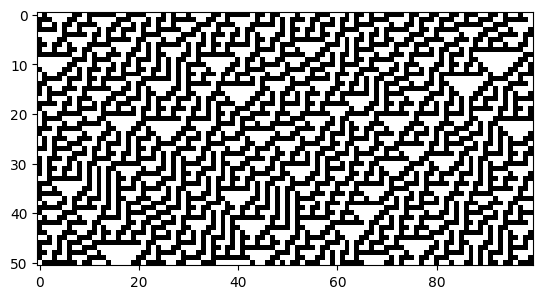

In [4]:
import matplotlib.pyplot as plt

def run_rule_30_simulation_visualize(initial_state, steps):
    states = [initial_state.numpy()]
    state = initial_state
    for step in range(steps):
        state = rule_30_step(state)
        states.append(state.numpy())

    plt.imshow(states, cmap='binary')
    plt.show()

run_rule_30_simulation_visualize(initial_state, steps)


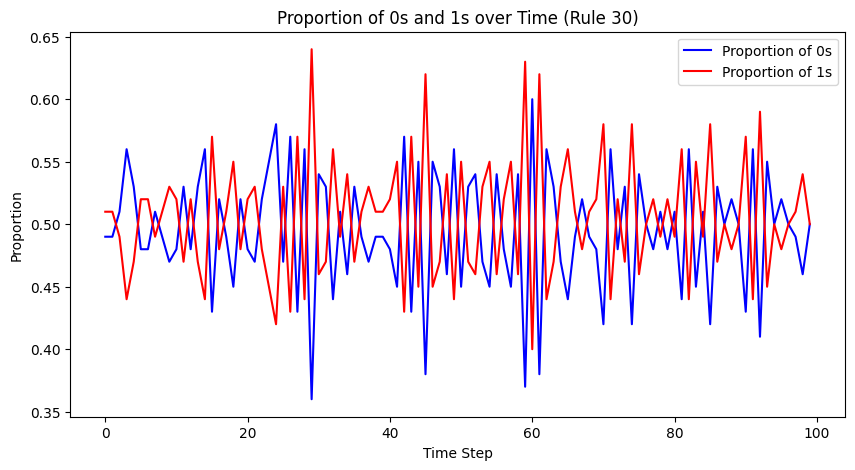

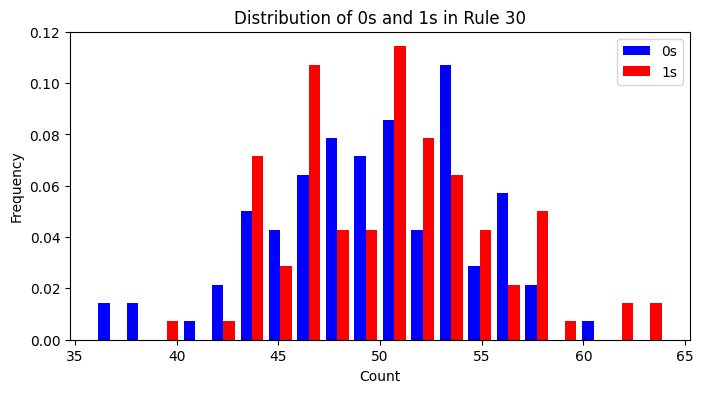

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

width = 100
steps = 100

def random_initial_row(width):
    return tf.cast(tf.random.uniform([width], minval=0, maxval=2, dtype=tf.int32), dtype=tf.int32)

def rule_30_step(state):
    left_neighbors = tf.roll(state, shift=1, axis=0)
    right_neighbors = tf.roll(state, shift=-1, axis=0)
    new_state = (left_neighbors & (~state) & (~right_neighbors)) | \
                ((~left_neighbors) & state & right_neighbors) | \
                ((~left_neighbors) & state & (~right_neighbors)) | \
                ((~left_neighbors) & (~state) & right_neighbors)
    return new_state

def run_rule_30_distribution(initial_state, steps):
    state = initial_state
    counts_of_zeros = []
    counts_of_ones = []

    for step in range(steps):
        count_zeros = tf.reduce_sum(tf.cast(state == 0, tf.int32)).numpy()
        count_ones = tf.reduce_sum(tf.cast(state == 1, tf.int32)).numpy()

        counts_of_zeros.append(count_zeros)
        counts_of_ones.append(count_ones)

        state = rule_30_step(state)

    return counts_of_zeros, counts_of_ones

initial_state = random_initial_row(width)

counts_of_zeros, counts_of_ones = run_rule_30_distribution(initial_state, steps)

total_cells = width
proportions_of_zeros = np.array(counts_of_zeros) / total_cells
proportions_of_ones = np.array(counts_of_ones) / total_cells

plt.figure(figsize=(10, 5))
plt.plot(proportions_of_zeros, label='Proportion of 0s', color='blue')
plt.plot(proportions_of_ones, label='Proportion of 1s', color='red')
plt.xlabel('Time Step')
plt.ylabel('Proportion')
plt.title('Proportion of 0s and 1s over Time (Rule 30)')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist([counts_of_zeros, counts_of_ones], bins=20, label=['0s', '1s'], color=['blue', 'red'], density=True)
plt.title('Distribution of 0s and 1s in Rule 30')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [8]:
def check_periodicity(initial_state, max_steps):
    states_seen = {}
    state = initial_state
    for step in range(max_steps):
        state_tuple = tuple(state.numpy())
        if state_tuple in states_seen:
            print(f"Periodic behavior detected after {step - states_seen[state_tuple]} steps.")
            return
        states_seen[state_tuple] = step
        state = rule_30_step(state)
    print("No periodic behavior detected.")

initial_state = random_initial_row(width)
check_periodicity(initial_state, 1000)


No periodic behavior detected.
